# bSMOTE: Borderline-1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('DTI_with_group.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()
df

,AD_MCP,AD_PCT,AD_GCC,AD_BCC,AD_SCC,AD_FX,AD_CST_R,AD_CST_L,AD_ML_R,AD_ML_L,...,RD_FXST,RD_SLF,RD_SFO,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,Research Group
0,0.001177,0.000974,0.001479,0.001474,0.001575,0.002257,0.001079,0.001081,0.001285,0.001287,...,0.000662,0.000577,0.000551,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,CN
2,0.001213,0.001075,0.001567,0.001585,0.001686,0.002492,0.001046,0.001056,0.001149,0.001126,...,0.000769,0.000694,0.000902,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,CN
3,0.001101,0.000965,0.001440,0.001433,0.001456,0.002379,0.000985,0.000990,0.001118,0.001113,...,0.000614,0.000546,0.000562,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,CN
4,0.001053,0.000904,0.001433,0.001470,0.001450,0.002421,0.000966,0.000977,0.001047,0.001041,...,0.000607,0.000535,0.000551,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,CN
5,0.001131,0.000974,0.001469,0.001498,0.001531,0.002291,0.000994,0.001017,0.001128,0.001105,...,0.000621,0.000559,0.000586,0.000558,0.000901,0.000458,0.000527,0.000605,0.000545,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.001117,0.001011,0.001574,0.001646,0.001712,0.002214,0.001094,0.001118,0.001228,0.001248,...,0.000734,0.000647,0.000913,0.000599,0.001623,0.000538,0.000680,0.000744,0.000652,AD
964,0.001181,0.001002,0.001423,0.001505,0.001530,0.002266,0.001088,0.001103,0.001224,0.001203,...,0.000584,0.000593,0.000624,0.000619,0.000878,0.000487,0.000567,0.000618,0.000571,CN
965,0.001126,0.000949,0.001542,0.001747,0.001642,0.002565,0.000978,0.001052,0.001162,0.001190,...,0.000577,0.000589,0.000835,0.000534,0.001478,0.000440,0.000694,0.000659,0.000597,AD
966,0.001090,0.000976,0.001354,0.001421,0.001427,0.001928,0.001018,0.001007,0.001241,0.001188,...,0.000560,0.000517,0.000514,0.000566,0.000729,0.000441,0.000469,0.000534,0.000509,CN


In [2]:
from imblearn.over_sampling import BorderlineSMOTE as bSMOTE
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_resampled, y_resampled = bSMOTE(kind='borderline-1').fit_resample(X, y)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [6]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [7]:
cm

array([[153,   0,   0,   2,   2,   1],
       [ 17,  18,  27,  32,  36,  33],
       [  7,   3, 109,   5,   1,   1],
       [  0,   0,   1, 126,   0,   0],
       [  3,   4,   7,  24, 101,  18],
       [  3,   0,   1,   2,   3, 146]])

In [8]:
ac

0.7370203160270881

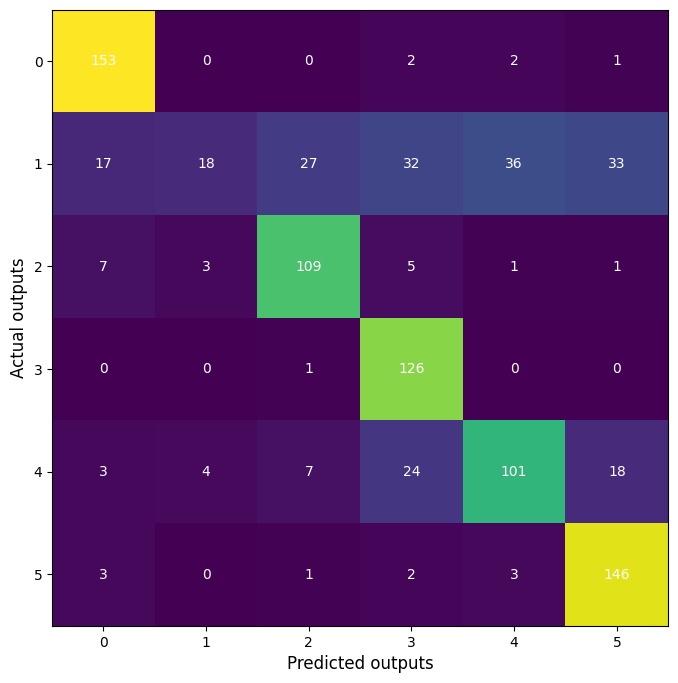

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(6))
ax.yaxis.set(ticks=range(6))
for i in range(6):
    for j in range(6):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

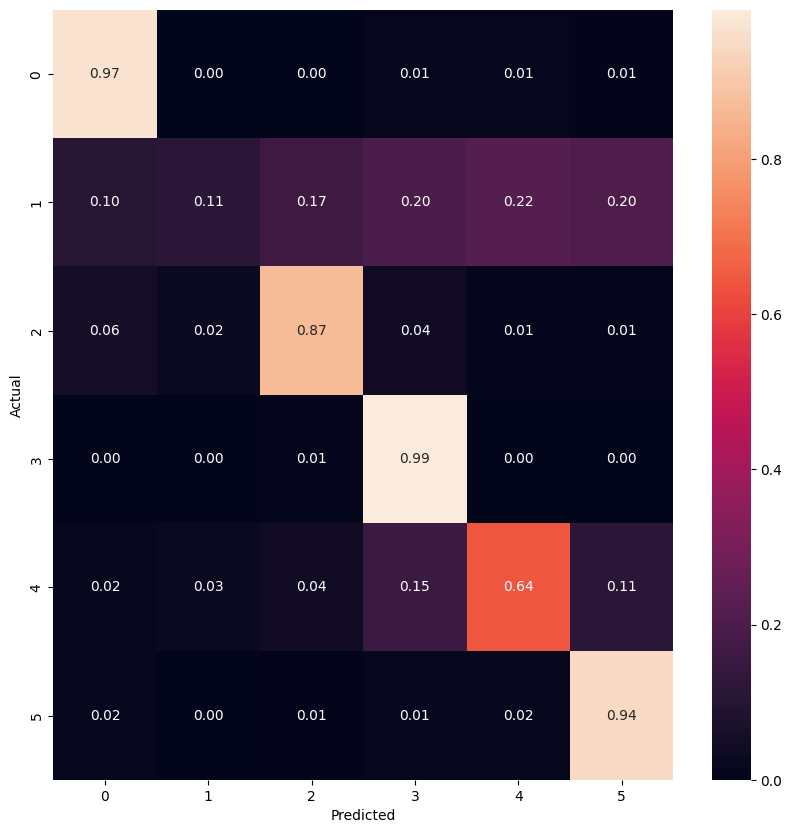

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

### Combined MCI groups

In [11]:
df = pd.read_csv('DTI_with_group_comb.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()
df

,AD_MCP,AD_PCT,AD_GCC,AD_BCC,AD_SCC,AD_FX,AD_CST_R,AD_CST_L,AD_ML_R,AD_ML_L,...,RD_FXST,RD_SLF,RD_SFO,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,Research Group
0,0.001177,0.000974,0.001479,0.001474,0.001575,0.002257,0.001079,0.001081,0.001285,0.001287,...,0.000662,0.000577,0.000551,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,CN
2,0.001213,0.001075,0.001567,0.001585,0.001686,0.002492,0.001046,0.001056,0.001149,0.001126,...,0.000769,0.000694,0.000902,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,CN
3,0.001101,0.000965,0.001440,0.001433,0.001456,0.002379,0.000985,0.000990,0.001118,0.001113,...,0.000614,0.000546,0.000562,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,CN
4,0.001053,0.000904,0.001433,0.001470,0.001450,0.002421,0.000966,0.000977,0.001047,0.001041,...,0.000607,0.000535,0.000551,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,CN
5,0.001131,0.000974,0.001469,0.001498,0.001531,0.002291,0.000994,0.001017,0.001128,0.001105,...,0.000621,0.000559,0.000586,0.000558,0.000901,0.000458,0.000527,0.000605,0.000545,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.001117,0.001011,0.001574,0.001646,0.001712,0.002214,0.001094,0.001118,0.001228,0.001248,...,0.000734,0.000647,0.000913,0.000599,0.001623,0.000538,0.000680,0.000744,0.000652,AD
964,0.001181,0.001002,0.001423,0.001505,0.001530,0.002266,0.001088,0.001103,0.001224,0.001203,...,0.000584,0.000593,0.000624,0.000619,0.000878,0.000487,0.000567,0.000618,0.000571,CN
965,0.001126,0.000949,0.001542,0.001747,0.001642,0.002565,0.000978,0.001052,0.001162,0.001190,...,0.000577,0.000589,0.000835,0.000534,0.001478,0.000440,0.000694,0.000659,0.000597,AD
966,0.001090,0.000976,0.001354,0.001421,0.001427,0.001928,0.001018,0.001007,0.001241,0.001188,...,0.000560,0.000517,0.000514,0.000566,0.000729,0.000441,0.000469,0.000534,0.000509,CN


In [13]:
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_resampled, y_resampled = bSMOTE(kind='borderline-1').fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30, random_state = 2)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [15]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [16]:
cm

array([[176,   2,   1],
       [ 34,  47,  88],
       [ 44,  16,  91]])

In [17]:
ac

0.6292585170340681

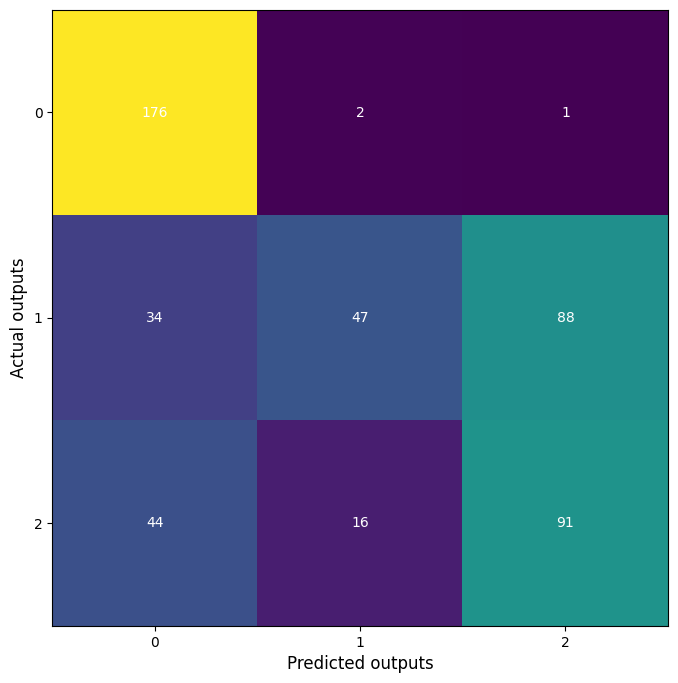

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

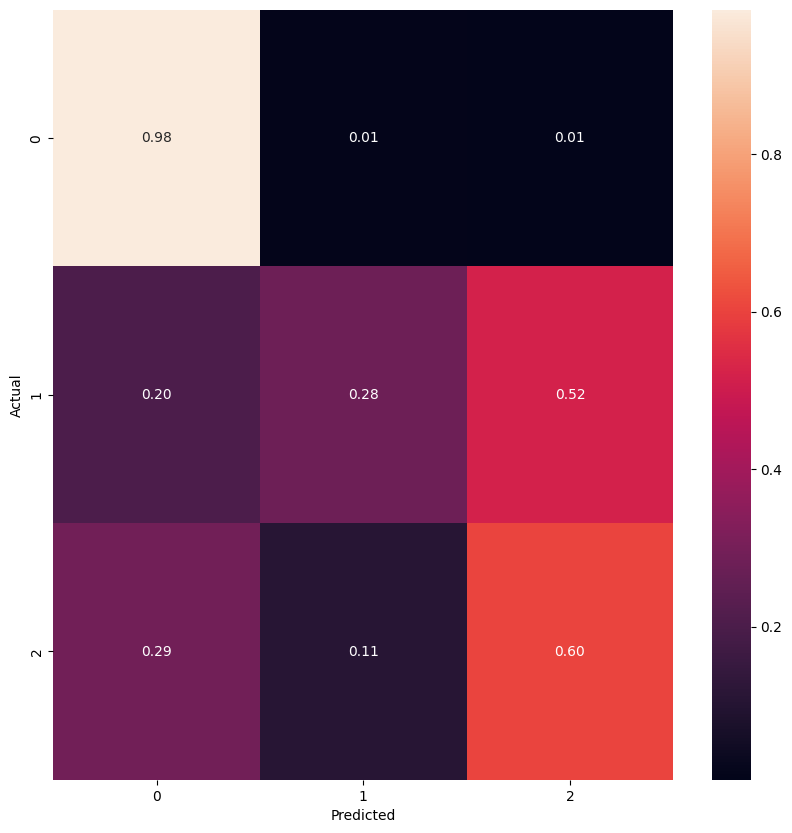

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          AD       0.69      0.98      0.81       179
          CN       0.72      0.28      0.40       169
         MCI       0.51      0.60      0.55       151

    accuracy                           0.63       499
   macro avg       0.64      0.62      0.59       499
weighted avg       0.65      0.63      0.59       499



# bSMOTE with SVM

In [21]:
from imblearn.over_sampling import SVMSMOTE
df = pd.read_csv('DTI_with_group.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()

In [22]:
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_resampled, y_resampled = SVMSMOTE().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=23)

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [25]:
cm

array([[74,  0,  8,  2,  0,  0],
       [21, 34, 18, 24, 14, 33],
       [ 9,  5, 72,  3,  1,  6],
       [ 3,  0,  0, 83,  5,  1],
       [ 9, 11,  8,  8, 75, 24],
       [ 4,  0,  1,  4,  1, 86]])

In [26]:
ac

0.6553323029366306

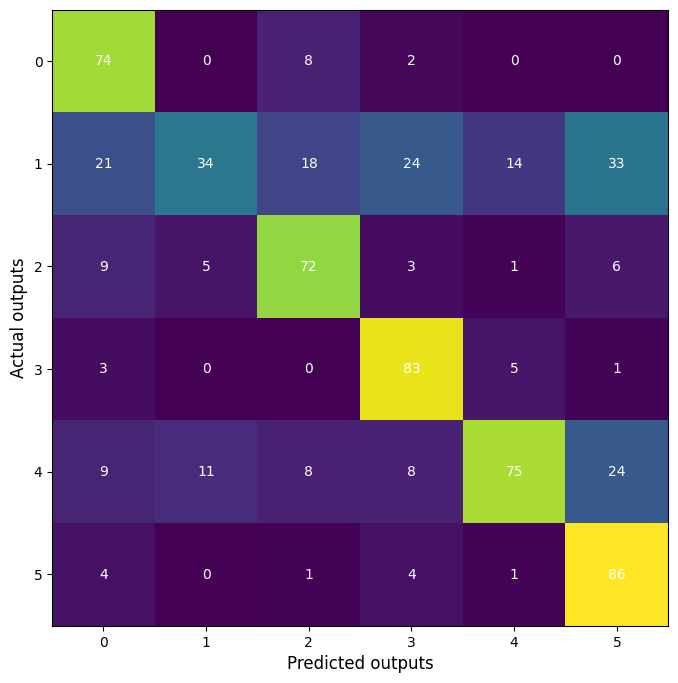

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(6))
ax.yaxis.set(ticks=range(6))
for i in range(6):
    for j in range(6):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

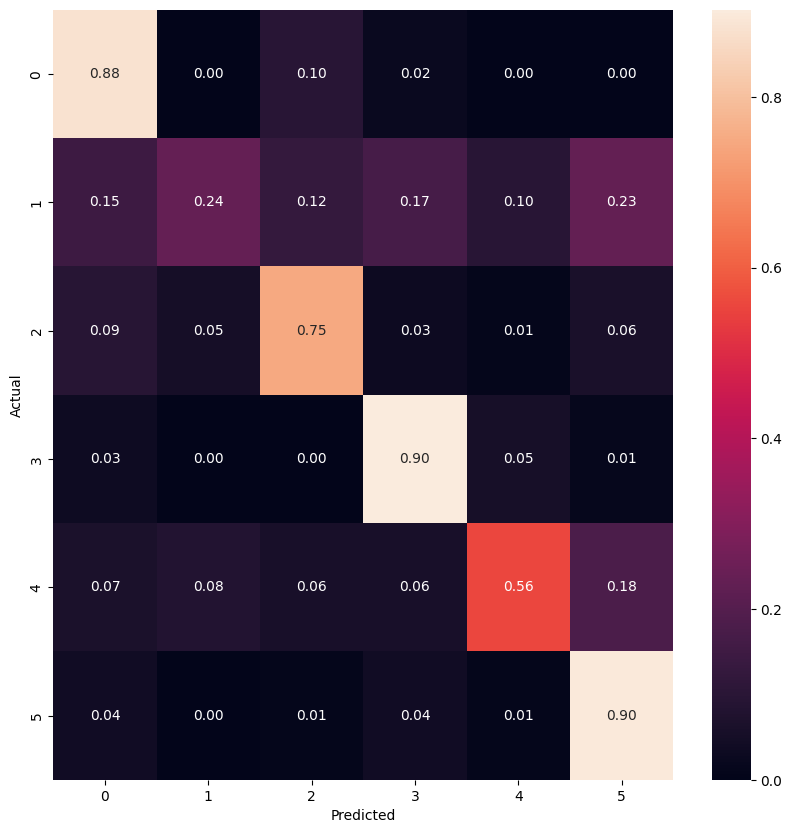

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          AD       0.62      0.88      0.73        84
          CN       0.68      0.24      0.35       144
        EMCI       0.67      0.75      0.71        96
        LMCI       0.67      0.90      0.77        92
         MCI       0.78      0.56      0.65       135
         SMC       0.57      0.90      0.70        96

    accuracy                           0.66       647
   macro avg       0.67      0.70      0.65       647
weighted avg       0.67      0.66      0.63       647



### Combined MCI groups

In [30]:
df = pd.read_csv('DTI_with_group_comb.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()

In [31]:
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_resampled, y_resampled = SVMSMOTE().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=24)

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [34]:
cm

array([[95,  1,  1],
       [37, 69, 59],
       [38, 35, 92]])

In [35]:
ac

0.5995316159250585

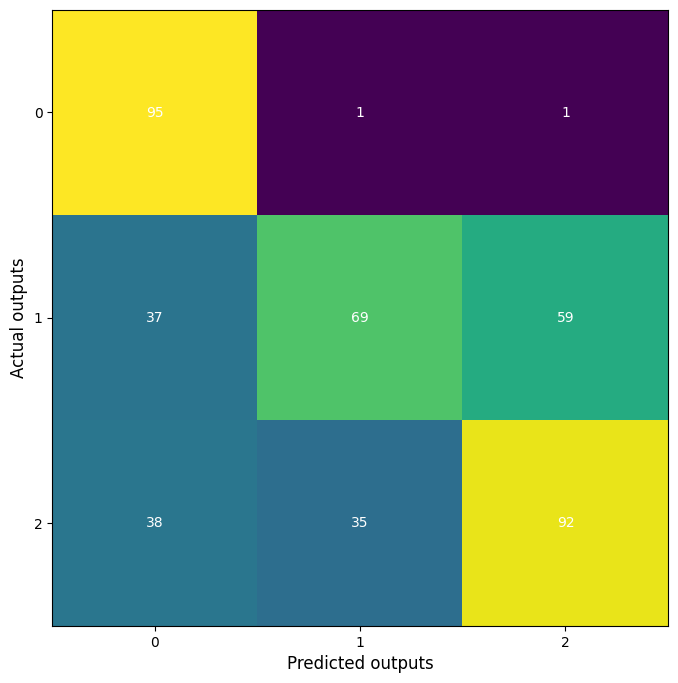

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

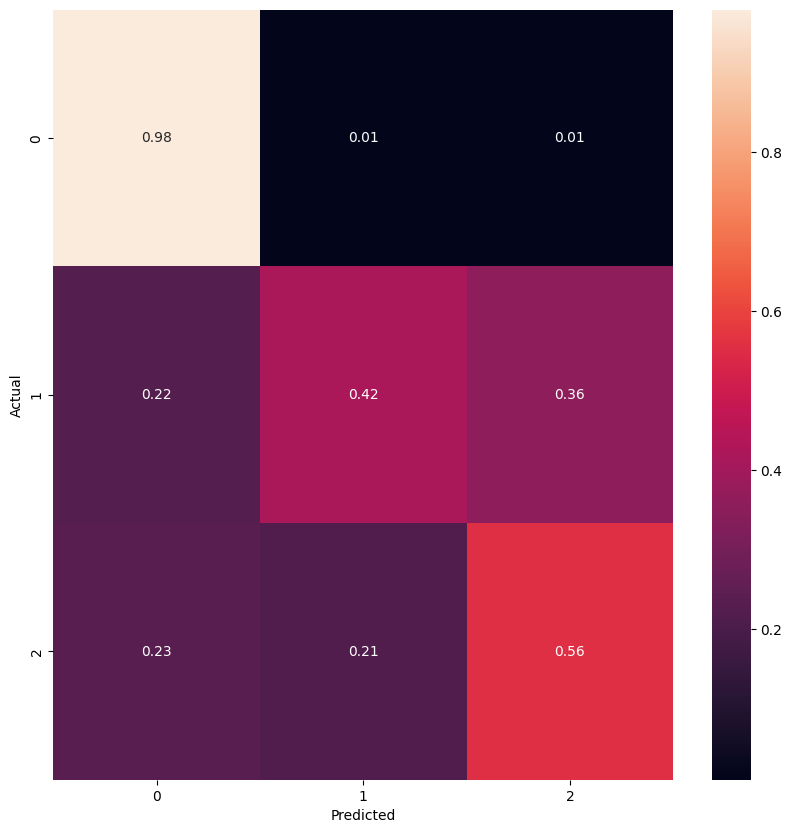

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          AD       0.56      0.98      0.71        97
          CN       0.66      0.42      0.51       165
         MCI       0.61      0.56      0.58       165

    accuracy                           0.60       427
   macro avg       0.61      0.65      0.60       427
weighted avg       0.61      0.60      0.58       427



# SMOTE + ENN

In [39]:
df = pd.read_csv('DTI_with_group.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()

In [40]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=4)
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=26)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [43]:
cm

array([[129,   0,   3,   8,   0,   2],
       [  0,   0,   3,   2,   2,   2],
       [  4,   0, 131,   3,   1,   8],
       [  2,   0,   0, 140,   0,   1],
       [  7,   0,   1,   9,  91,  16],
       [  6,   0,   3,   4,   1, 139]])

In [44]:
ac

0.8774373259052924

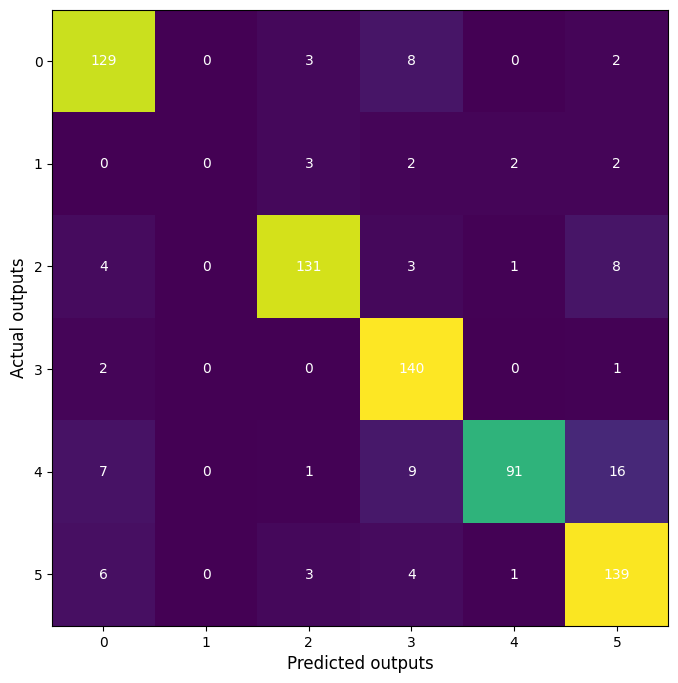

In [45]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(6))
ax.yaxis.set(ticks=range(6))
for i in range(6):
    for j in range(6):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

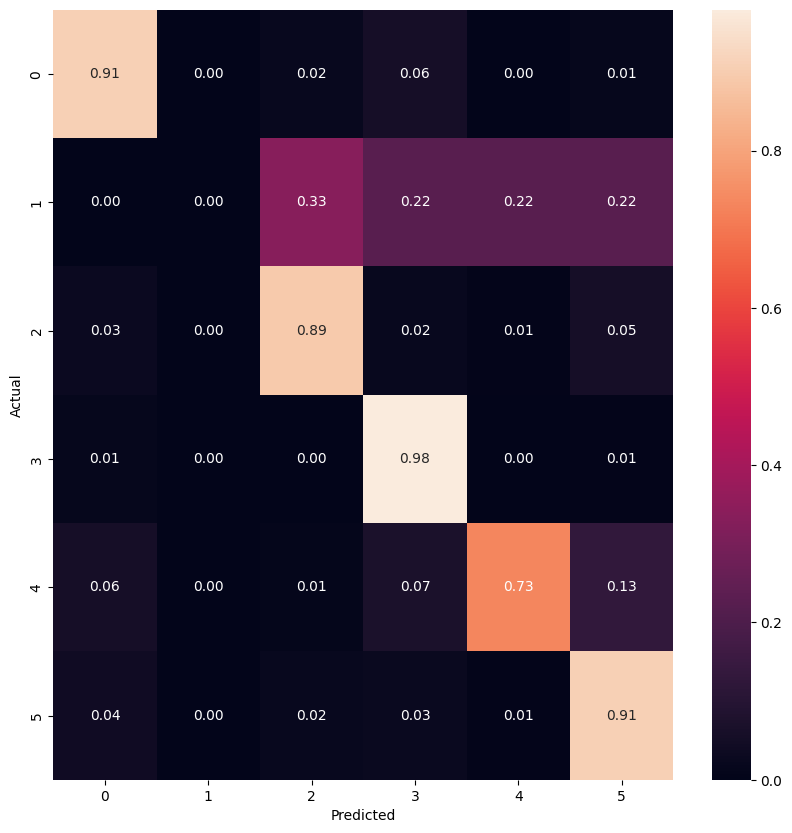

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          AD       0.87      0.91      0.89       142
          CN       0.00      0.00      0.00         9
        EMCI       0.93      0.89      0.91       147
        LMCI       0.84      0.98      0.91       143
         MCI       0.96      0.73      0.83       124
         SMC       0.83      0.91      0.87       153

    accuracy                           0.88       718
   macro avg       0.74      0.74      0.73       718
weighted avg       0.87      0.88      0.87       718



/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

### Combined MCI groups

<span style="color:blue">wow color fun</span>

In [48]:
df = pd.read_csv('DTI_with_group_comb.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()

In [49]:
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=27)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=26)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [52]:
cm

array([[173,   0,   0],
       [ 13,   3,  14],
       [ 36,   1,  62]])

In [53]:
ac

0.7880794701986755

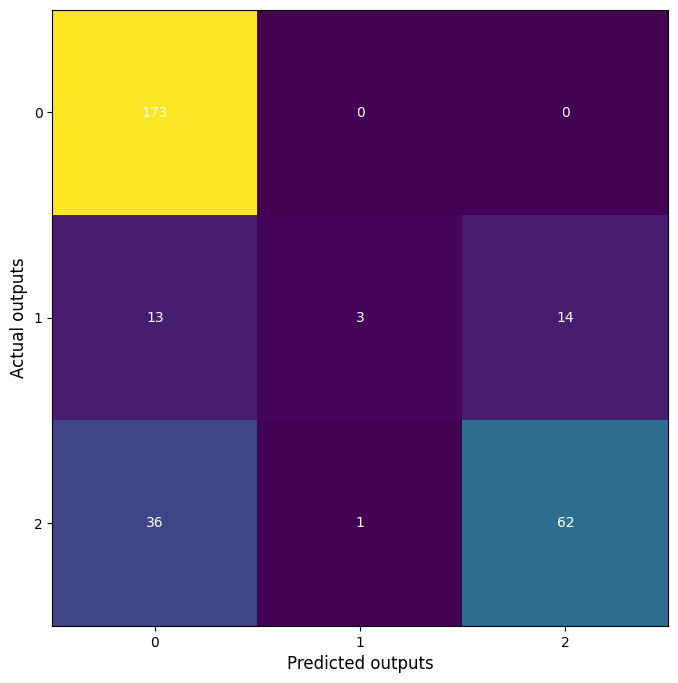

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

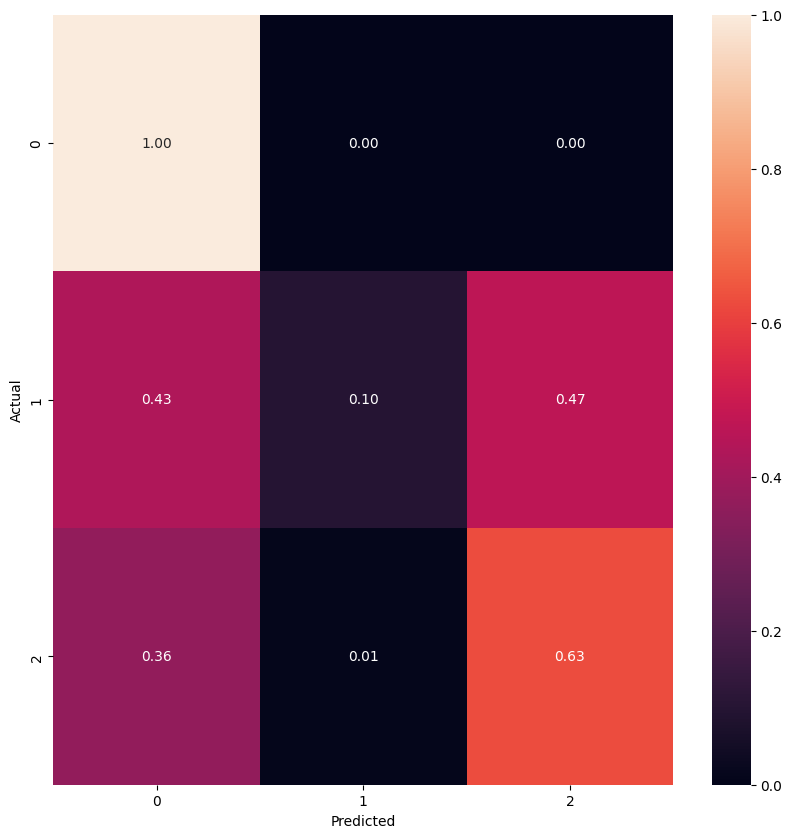

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          AD       0.78      1.00      0.88       173
          CN       0.75      0.10      0.18        30
         MCI       0.82      0.63      0.71        99

    accuracy                           0.79       302
   macro avg       0.78      0.58      0.59       302
weighted avg       0.79      0.79      0.75       302

